In [203]:
import torch
import torch.nn as nn
import numpy as np

In [144]:
n_input = 1
n_hidden = 1
n_out = 1
batch_size = 10
learning_rate = 0.025

hrs =     [[0.5,0.75,1,1.25,1.5,1.75,1.75,2,2.25,2.5,
          2.75,3,3.25,3.5,4,4.25,4.5,4.75,5,5.5]]

passed =  [[0,0,0,0,0,0,1,0,1,0,
           1,0,1,0,1,1,1,1,1,1]]


x_data = torch.FloatTensor(hrs)
y_data = torch.FloatTensor(passed)

print(x_data)
x_data = torch.transpose(x_data,0,1)
y_data = torch.transpose(y_data,0,1)


print(x_data)

tensor([[0.5000, 0.7500, 1.0000, 1.2500, 1.5000, 1.7500, 1.7500, 2.0000, 2.2500,
         2.5000, 2.7500, 3.0000, 3.2500, 3.5000, 4.0000, 4.2500, 4.5000, 4.7500,
         5.0000, 5.5000]])
tensor([[0.5000],
        [0.7500],
        [1.0000],
        [1.2500],
        [1.5000],
        [1.7500],
        [1.7500],
        [2.0000],
        [2.2500],
        [2.5000],
        [2.7500],
        [3.0000],
        [3.2500],
        [3.5000],
        [4.0000],
        [4.2500],
        [4.5000],
        [4.7500],
        [5.0000],
        [5.5000]])


In [145]:
model = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.Sigmoid())
print(model)


loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Sigmoid()
)


In [146]:
losses = []
for epoch in range(5000):

    
    pred_y = model(x_data)
    loss = loss_function(pred_y, y_data)
    losses.append(loss.item())

    model.zero_grad()
    loss.backward()

    optimizer.step()

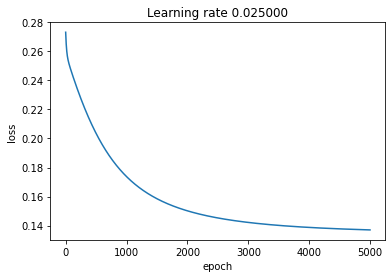

In [147]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()


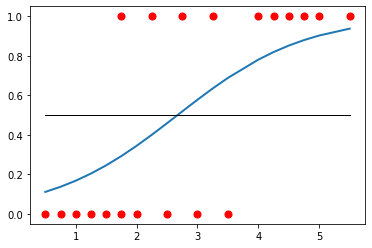

In [148]:
y = model(x_data).detach()

plt.plot(x_data,y,linewidth=2)
plt.plot(x_data,y*0+0.5,c='k',linewidth=1)
plt.scatter(x_data,y_data,c='r',s=50)
plt.show()

In [202]:
params = []
for name,param in model.named_parameters():

  print(name)
  params.append(param.item())

m = nn.Sigmoid()
input = torch.tensor(2)
output = m(input)

print(input)
print(output)

0.weight
0.bias
tensor(2)
tensor(0.8808)


0.9562879800796509
-2.5557913780212402


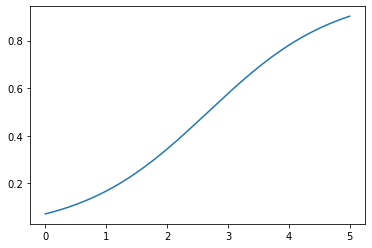

In [213]:
for i in params:

  print(i)

weight = params[0]
bias = params[1]

x = np.linspace(0,5,1001)

A = torch.tensor(weight*x + bias)

y = m(A)

plt.plot(x,y)
plt.show()


https://towardsdatascience.com/build-a-simple-neural-network-using-pytorch-38c55158028d
